In [1]:
import os
import numpy as np
import cv2
from src.tools import imgPeak, imgsPeak
from findpeaks import findpeaks
import src.seelib.cv2eff as cve 
import matplotlib.pyplot as plt
from src.loader import Sampler
from src.graph import Graph
from src.solver import graphSolver

sampler = Sampler("raw_combine")
making = "HDA_4"
hup_layer = [10, 11, 12]
length = {"HDA_3": 12, "HDA_4": 9, "HDA_5": 9, "HDA_6": 7, "HDA_7": 12, "HDA_8": 12}
#HDA_5 -10


In [2]:
name, imgs, pl = sampler.get(making)

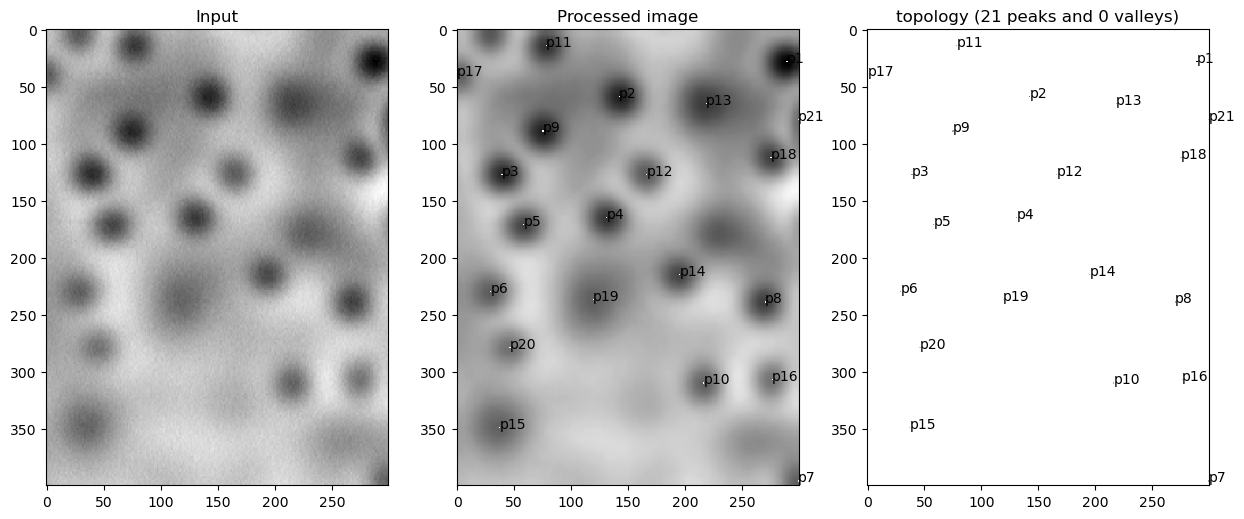

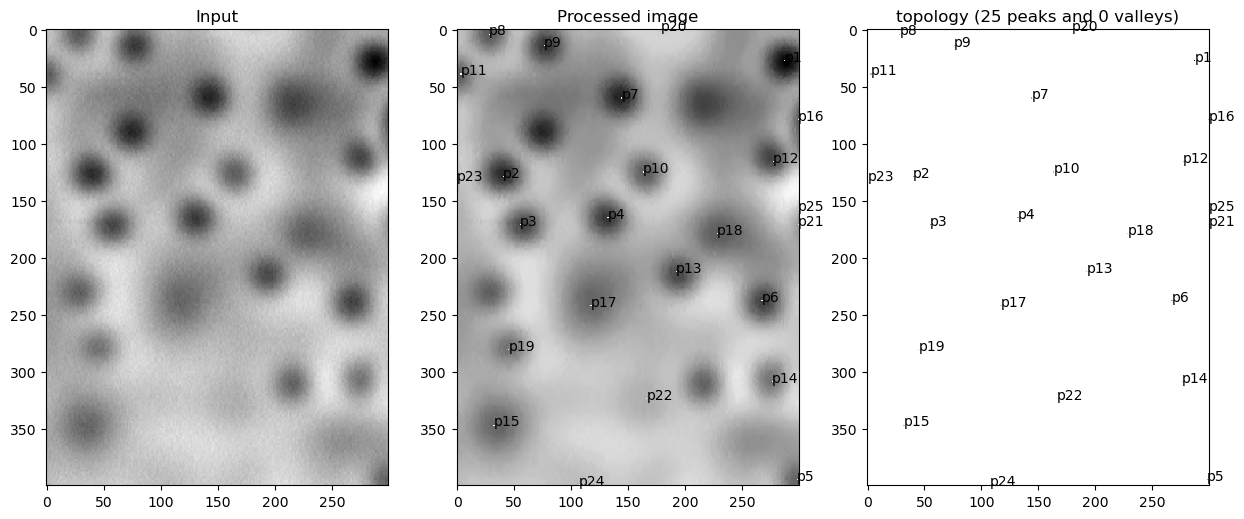

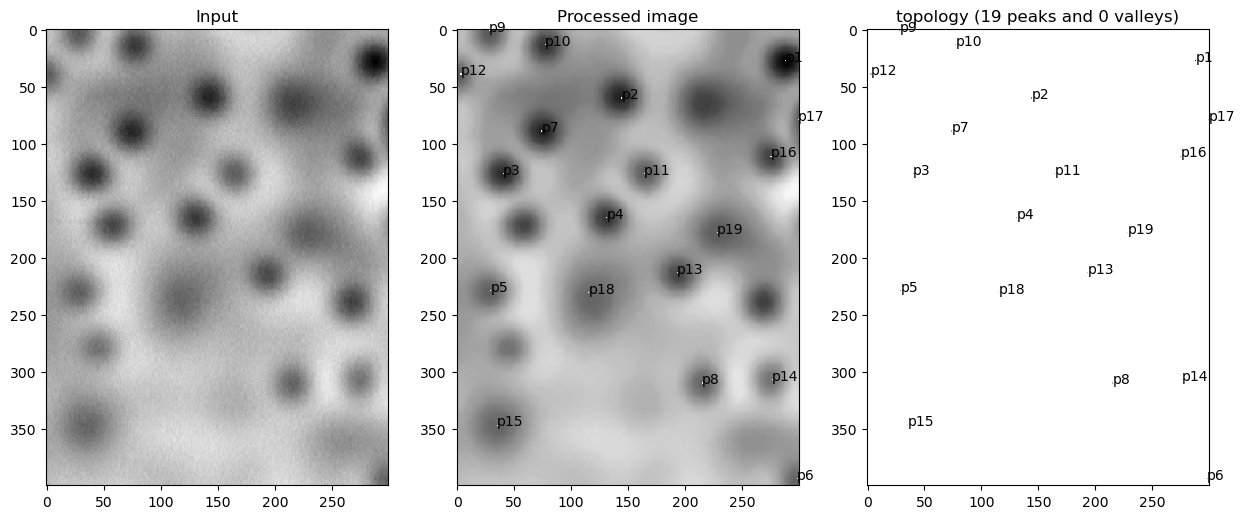

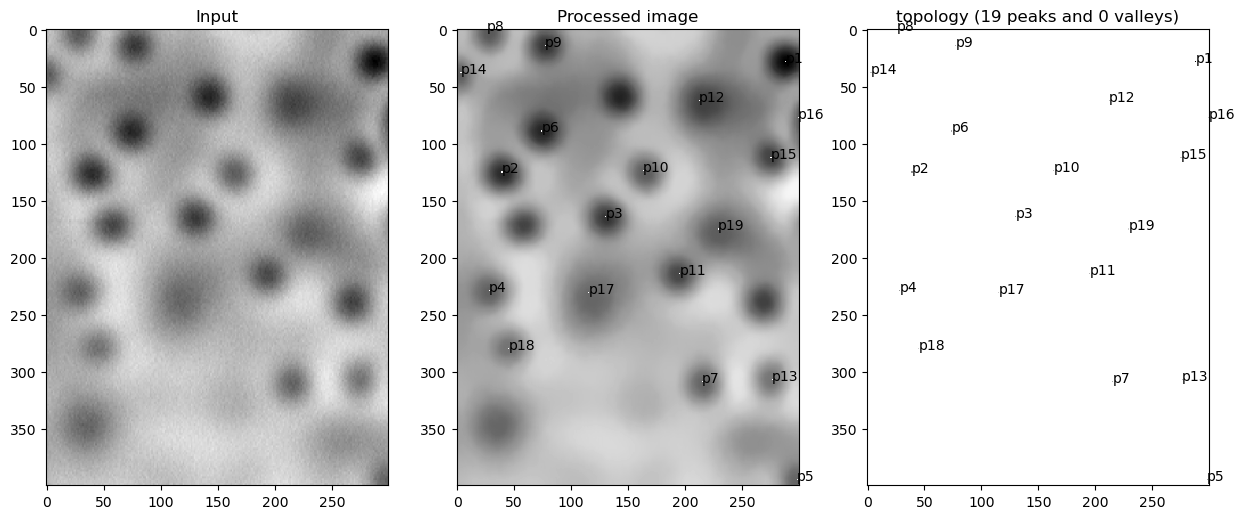

In [3]:
fp1 = findpeaks(method='topology', denoise='lee_enhanced',
               window=9, limit=40, interpolate=5)

fp2 = findpeaks(method='topology', denoise='fastnl',
               window=3, limit=10, interpolate=10)

fp3 = findpeaks(method='topology', denoise='fastnl',
               window=5, limit=40, interpolate=10)

fp4 = findpeaks(method='topology', denoise='fastnl',
               window=7, limit=40, interpolate=10)

pos = imgsPeak(imgs[8], [fp1, fp2, fp3, fp4], cluster_threshold= 10, inverse=True, border=2, show=True, flip= 0)

pos[...,0] = pos[...,0] -15
pos[...,1] = pos[...,1]

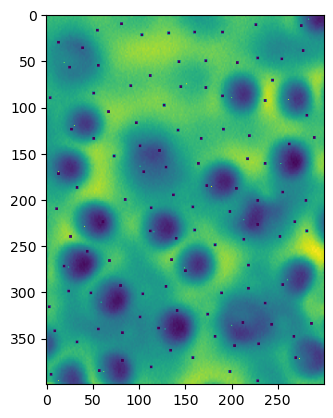

In [4]:
bg = imgs[6].copy()
bg = cve.drawPoints(bg, pos[...,:2] / bg.shape[-1::-1], flip = 1)
bg = cve.drawPoints(bg, pl.pos["O"][...,:2] / pl.lattice[:2], color = (0,0,0), size = 3, flip = 1)
plt.imshow(bg)

In [5]:
g = Graph(name, imgs, pl, res = 10)

In [6]:
g.detect_Hup(pos[...,:3])
g.make_edges()

In [7]:
gs = graphSolver(g)
gs.solve()

In [8]:
g.pp_all_nodes()
g.save(f"/home/supercgor/gitfile/AFM-RepairTool/result/")# 

In [9]:
out_img = g.plotEdges(3, transparency=0.5, text=False)
out_img = g.plotNodes(out_img, reverse= True, text= False)

(400, 300)


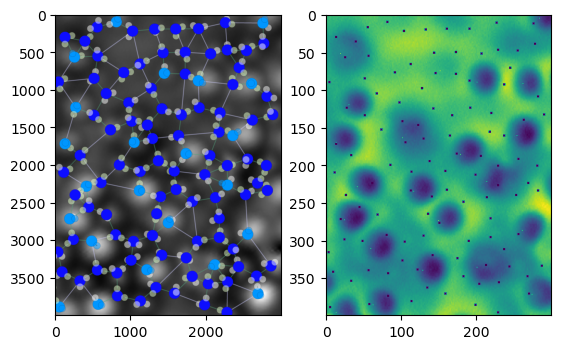

In [10]:
print(imgs[0].shape)
a = plt.subplot(121)
b = plt.subplot(122)
cv2.imwrite("test.png", out_img)
a.imshow(out_img)
b.imshow(bg)

In [11]:
s, fix = g.wrtie_data()

In [12]:
with open(f"/home/supercgor/gitfile/AFM-RepairTool/result/{making}.data", "w") as f:
    f.write(s)
with open(f"/home/supercgor/gitfile/AFM-RepairTool/result/{making}.fix", "w") as f:
    f.write(" ".join(str(i) for i in fix))


In [13]:
hup = g.get_nodes_by_attributes("Hup", True)
hup = [h for h in hup if g.nodes[h]['elem'] == "H"]